In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/speech_data_classification.zip

Archive:  /content/drive/MyDrive/speech_data_classification.zip
   creating: speech_data_classification/
   creating: speech_data_classification/healthy/
   creating: speech_data_classification/healthy/sub-01/
   creating: speech_data_classification/healthy/sub-01/anat/
  inflating: speech_data_classification/healthy/sub-01/anat/sub-01_T1w.nii.gz  
   creating: speech_data_classification/healthy/sub-01/func/
  inflating: speech_data_classification/healthy/sub-01/func/sub-01_task-speech_bold.nii.gz  
   creating: speech_data_classification/healthy/sub-02/
   creating: speech_data_classification/healthy/sub-02/anat/
  inflating: speech_data_classification/healthy/sub-02/anat/sub-02_T1w.nii.gz  
   creating: speech_data_classification/healthy/sub-02/func/
  inflating: speech_data_classification/healthy/sub-02/func/sub-02_task-speech_bold.nii.gz  
   creating: speech_data_classification/healthy/sub-03/
   creating: speech_data_classification/healthy/sub-03/anat/
  inflating: speech_data_cl

In [ ]:
import os
import gzip
import shutil

# Define the base directory
base_dir = "/content/speech_data_classification"  # Change this if needed

def list_files(base_path):
    """
    Lists all files in the given directory and its subdirectories.
    """
    print("Scanning files in the directory...")
    for root, _, files in os.walk(base_path):
        for file in files:
            print(os.path.join(root, file))

def unzip_nii_gz_files(base_path):
    """
    Unzips all .nii.gz files in the given directory and its subdirectories.
    """
    for root, _, files in os.walk(base_path):
        for file in files:
            if file.endswith(".nii.gz"):
                gz_file_path = os.path.join(root, file)
                nii_file_path = os.path.join(root, file[:-3])  # Remove .gz extension

                try:
                    # Unzip the .gz file
                    with gzip.open(gz_file_path, 'rb') as gz_file:
                        with open(nii_file_path, 'wb') as nii_file:
                            shutil.copyfileobj(gz_file, nii_file)
                    print(f"Unzipped: {gz_file_path} -> {nii_file_path}")
                except FileNotFoundError:
                    print(f"File not found: {gz_file_path}. Skipping...")
                except Exception as e:
                    print(f"Error processing {gz_file_path}: {e}")

# First, list all files to verify the structure
list_files(base_dir)

# Then, unzip the files
unzip_nii_gz_files(base_dir)

Scanning files in the directory...
/content/speech_data_classification/healthy/sub-20/func/sub-20_task-speech_bold.nii.gz
/content/speech_data_classification/healthy/sub-20/anat/sub-20_T1w.nii.gz
/content/speech_data_classification/healthy/sub-12/func/sub-12_task-speech_bold.nii.gz
/content/speech_data_classification/healthy/sub-12/anat/sub-12_T1w.nii.gz
/content/speech_data_classification/healthy/sub-25/func/sub-25_task-speech_bold.nii.gz
/content/speech_data_classification/healthy/sub-25/anat/sub-25_T1w.nii.gz
/content/speech_data_classification/healthy/sub-05/func/sub-05_task-speech_bold.nii.gz
/content/speech_data_classification/healthy/sub-05/anat/sub-05_T1w.nii.gz
/content/speech_data_classification/healthy/sub-03/func/sub-03_task-speech_bold.nii.gz
/content/speech_data_classification/healthy/sub-03/anat/sub-03_T1w.nii.gz
/content/speech_data_classification/healthy/sub-15/func/sub-15_task-speech_bold.nii.gz
/content/speech_data_classification/healthy/sub-15/anat/sub-15_T1w.nii.gz

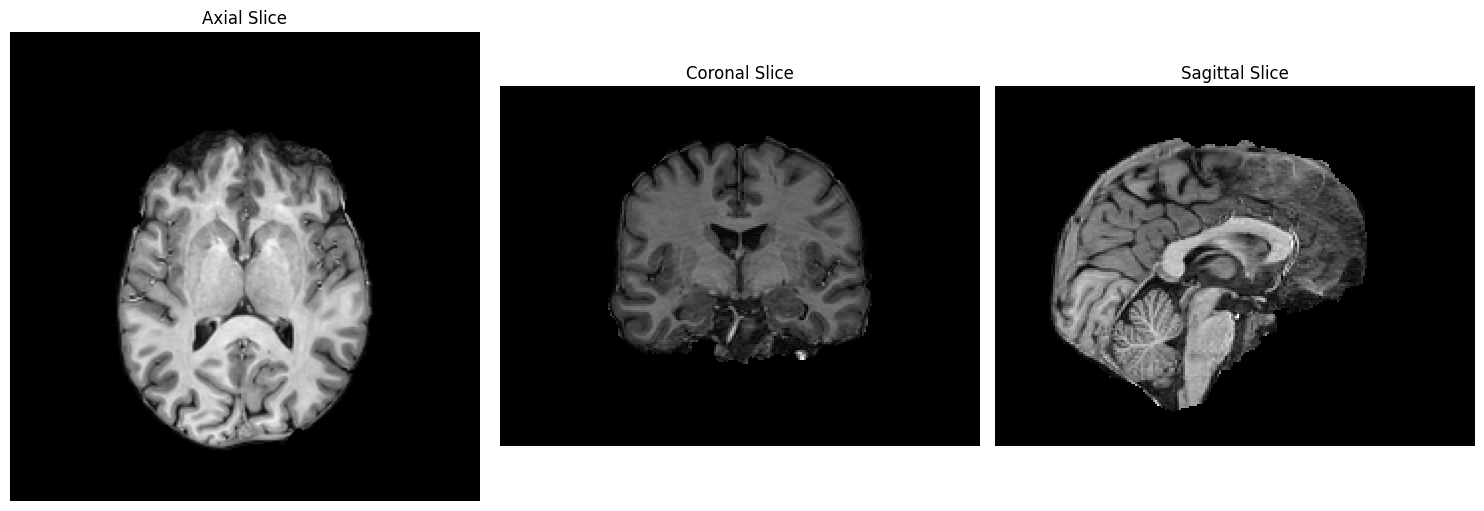

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def plot_middle_slices(nii_file_path):
    """
    Load a .nii file and plot the middle slices along each axis.
    """
    # Load the .nii file
    img = nib.load(nii_file_path)
    data = img.get_fdata()

    # Get the middle slices
    middle_slices = {
        "Axial": data[:, :, data.shape[2] // 2],
        "Coronal": data[:, data.shape[1] // 2, :],
        "Sagittal": data[data.shape[0] // 2, :, :]
    }

    # Plot the slices
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for ax, (title, slice_data) in zip(axes, middle_slices.items()):
        ax.imshow(np.rot90(slice_data), cmap="gray")
        ax.set_title(f"{title} Slice")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
nii_file_path = "/content/speech_data_classification/healthy/sub-01/anat/sub-01_T1w.nii"  # Replace with your .nii file path
plot_middle_slices(nii_file_path)


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def save_axial_slices(nii_dir, dest_dir):
    """
    Extract all axial slices from .nii files in a directory and save them as images.

    Parameters:
    nii_dir (str): Directory containing the .nii files.
    dest_dir (str): Destination directory to save the slices.
    """
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for root, _, files in os.walk(nii_dir):
        for file in files:
            if file.endswith(".nii"):
                nii_file_path = os.path.join(root, file)
                try:
                    # Load the .nii file
                    img = nib.load(nii_file_path)
                    data = img.get_fdata()

                    # Save each axial slice as an image
                    for z in range(data.shape[2]):
                        slice_data = data[:, :, z]
                        slice_file_name = f"{os.path.splitext(file)[0]}_slice_{z:03d}.png"
                        slice_file_path = os.path.join(dest_dir, slice_file_name)

                        # Save the slice as an image
                        plt.imsave(slice_file_path, np.rot90(slice_data), cmap="gray")
                    print(f"Processed {nii_file_path}, saved slices to {dest_dir}")
                except Exception as e:
                    print(f"Error processing {nii_file_path}: {e}")

# Paths for the classes
healthy_dir = "/content/speech_data_classification/healthy"  # Path to healthy class
schizophrenia_dir = "/content/speech_data_classification/schizophernia"  # Path to schizophrenia class

# Destination folders for slices
healthy_slices_dir = "/content/drive/MyDrive/final_data/healthy"
schizophrenia_slices_dir = "/content/drive/MyDrive/final_data/schizophrenia"

# Process and save slices for each class
save_axial_slices(healthy_dir, healthy_slices_dir)
save_axial_slices(schizophrenia_dir, schizophrenia_slices_dir)

In [ ]:
import os
import zipfile

def zip_file_or_folder(source_path, zip_dest_path):
    """
    Compress a file or folder into a zip archive.

    Parameters:
    source_path (str): Path to the file or folder to zip.
    zip_dest_path (str): Path to save the resulting zip file.
    """
    # Ensure the destination directory exists
    os.makedirs(os.path.dirname(zip_dest_path), exist_ok=True)

    # Create a zip archive
    with zipfile.ZipFile(zip_dest_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        if os.path.isfile(source_path):
            # If the source is a file, add it to the zip archive
            zipf.write(source_path, os.path.basename(source_path))
        elif os.path.isdir(source_path):
            # If the source is a folder, add its contents recursively
            for root, _, files in os.walk(source_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    # Add file to the zip archive with a relative path
                    zipf.write(file_path, os.path.relpath(file_path, source_path))
        else:
            print(f"Source path '{source_path}' does not exist.")
            return

    print(f"Zipped '{source_path}' into '{zip_dest_path}'.")

# Example usage
source_path = "/content/drive/MyDrive/final_data"  # Path to the file or folder to zip
zip_dest_path = "/content/drive/MyDrive/final_data.zip"  # Destination for the zip file

zip_file_or_folder(source_path, zip_dest_path)


Zipped '/content/drive/MyDrive/final_data' into '/content/drive/MyDrive/final_data.zip'.


#Hippocampus

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
# !rm -r "/content/tuberculosis-tb-chest-xray-dataset"

In [ ]:
dataset_url = "https://www.kaggle.com/datasets/haithem1999/hippocampus-annotated-dataset"

In [ ]:
import opendatasets as od
od.download(dataset_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: debg48
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/haithem1999/hippocampus-annotated-dataset


100%|██████████| 28.5M/28.5M [00:00<00:00, 91.8MB/s]


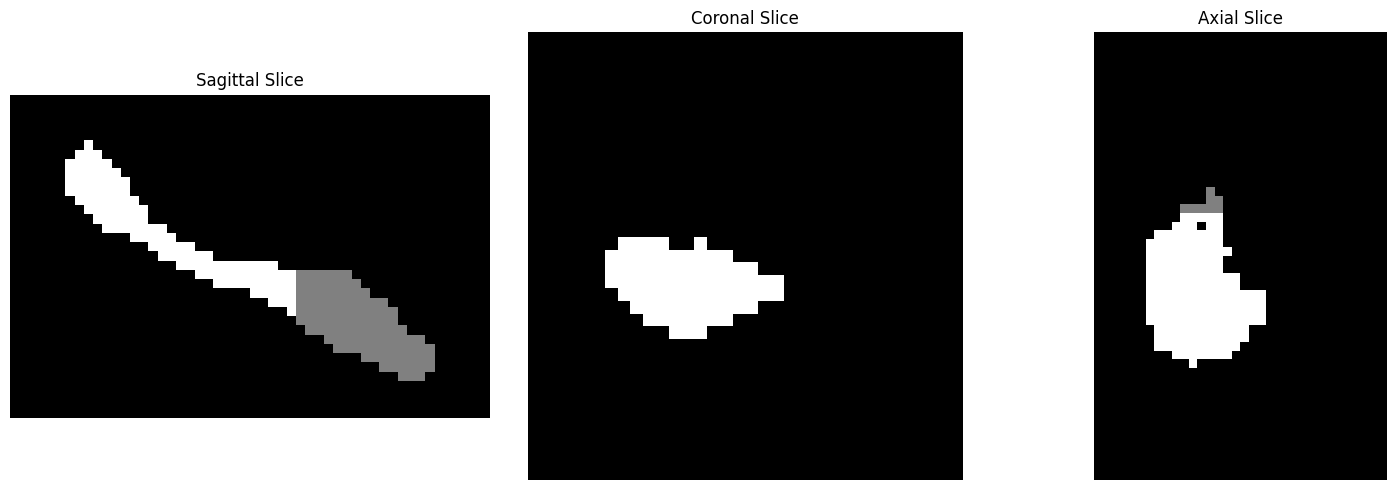

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

def view_slices(nii_file):
    # Load the NIfTI file
    img = nib.load(nii_file)
    img_data = img.get_fdata()

    # Get the center of the volume
    center_x = img_data.shape[0] // 2
    center_y = img_data.shape[1] // 2
    center_z = img_data.shape[2] // 2

    # Extract slices
    sagittal_slice = img_data[center_x, :, :]
    coronal_slice = img_data[:, center_y, :]
    axial_slice = img_data[:, :, center_z]

    # Plot the slices
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(sagittal_slice.T, cmap="gray", origin="lower")
    axes[0].set_title("Sagittal Slice")
    axes[0].axis("off")

    axes[1].imshow(coronal_slice.T, cmap="gray", origin="lower")
    axes[1].set_title("Coronal Slice")
    axes[1].axis("off")

    axes[2].imshow(axial_slice.T, cmap="gray", origin="lower")
    axes[2].set_title("Axial Slice")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
nii_file = "/content/hippocampus-annotated-dataset/Hippocampus/labelsTr/hippocampus_003.nii"  # Replace with the path to your .nii file
view_slices(nii_file)


In [ ]:
import os
import nibabel as nib
import numpy as np
from pathlib import Path
from PIL import Image

# Define paths
images_path = "/content/hippocampus-annotated-dataset/Hippocampus/imagesTr"
labels_path = "/content/hippocampus-annotated-dataset/Hippocampus/labelsTr"
output_healthy = "/content/drive/MyDrive/hippocampus/healthy_slices"
output_schizophrenic = "/content/drive/MyDrive/hippocampus/schizophrenic_slices"

# Create output directories
os.makedirs(output_healthy, exist_ok=True)
os.makedirs(output_schizophrenic, exist_ok=True)

def process_dataset(images_path, labels_path, output_healthy, output_schizophrenic):
    image_files = sorted(Path(images_path).glob("*.nii"))
    label_files = sorted(Path(labels_path).glob("*.nii"))

    for img_file, lbl_file in zip(image_files, label_files):
        # Load image and label
        img_data = nib.load(str(img_file)).get_fdata()
        lbl_data = nib.load(str(lbl_file)).get_fdata()

        # Process each slice
        for i in range(img_data.shape[2]):  # Assuming slices are along the third dimension
            img_slice = img_data[:, :, i]
            lbl_slice = lbl_data[:, :, i]

            # Determine the category based on the label
            if np.any((lbl_slice == 1) | (lbl_slice == 2)):  # Schizophrenic if labels 1 or 2 are present
                category = "schizophrenic"
                output_dir = output_schizophrenic
            else:  # Healthy if only background (label 0)
                category = "healthy"
                output_dir = output_healthy

            # Save the slice as an image
            output_file = os.path.join(output_dir, f"{img_file.stem}_slice_{i}.png")
            Image.fromarray((img_slice / img_slice.max() * 255).astype(np.uint8)).save(output_file)

            print(f"Saved {category} slice to {output_file}")

# Run the function
process_dataset(images_path, labels_path, output_healthy, output_schizophrenic)


Streaming output truncated to the last 5000 lines.
Saved schizophrenic slice to /content/drive/MyDrive/hippocampus/schizophrenic_slices/hippocampus_184_slice_26.png
Saved schizophrenic slice to /content/drive/MyDrive/hippocampus/schizophrenic_slices/hippocampus_184_slice_27.png
Saved healthy slice to /content/drive/MyDrive/hippocampus/healthy_slices/hippocampus_184_slice_28.png
Saved healthy slice to /content/drive/MyDrive/hippocampus/healthy_slices/hippocampus_184_slice_29.png
Saved healthy slice to /content/drive/MyDrive/hippocampus/healthy_slices/hippocampus_184_slice_30.png
Saved healthy slice to /content/drive/MyDrive/hippocampus/healthy_slices/hippocampus_184_slice_31.png
Saved healthy slice to /content/drive/MyDrive/hippocampus/healthy_slices/hippocampus_184_slice_32.png
Saved healthy slice to /content/drive/MyDrive/hippocampus/healthy_slices/hippocampus_185_slice_0.png
Saved healthy slice to /content/drive/MyDrive/hippocampus/healthy_slices/hippocampus_185_slice_1.png
Saved hea

In [ ]:
import shutil

# Define the folder to zip and the destination zip file
folder_to_zip = "/content/drive/MyDrive/hippocampus"
output_zip_file = "/content/drive/MyDrive/hippocampus.zip"

# Zip the folder
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Zipped folder saved at {output_zip_file}")


Zipped folder saved at /content/drive/MyDrive/hippocampus.zip
